In [2]:
#Name: Becca Dura

#importing each of the libraries we'll need
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Dropout
import matplotlib.pyplot as plt
%matplotlib inline

Using Theano backend.


In [4]:
# dimensions of our images.
img_width, img_height = 150, 150

#the directories where our train and test data is
train_data_dir = 'Monkey_Species/training'
validation_data_dir = 'Monkey_Species/validation'

#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 32
number_train_examples = 1097
number_validation_examples = 272

In [5]:
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1./255)

#These will look for our training and testing data
#in their respective directory, and it will figure out
#the class of each example based on the subfolder it is in
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')


Found 1097 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [7]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3),activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3),activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(64,activation = 'relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10,activation='softmax'))


model1.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

In [8]:
#train the third model
training_results1 = model1.fit_generator(
    train_generator,
    steps_per_epoch=number_train_examples // batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=number_validation_examples // batch_size)

Epoch 1/15
34/34 [==============================] - 116s 3s/step - loss: 2.3307 - acc: 0.1352 - val_loss: 2.1019 - val_acc: 0.2617
Epoch 2/15
34/34 [==============================] - 127s 4s/step - loss: 2.0723 - acc: 0.2910 - val_loss: 1.8850 - val_acc: 0.3458
Epoch 3/15
34/34 [==============================] - 126s 4s/step - loss: 1.7063 - acc: 0.3922 - val_loss: 1.6815 - val_acc: 0.4083
Epoch 4/15
34/34 [==============================] - 119s 4s/step - loss: 1.5634 - acc: 0.4611 - val_loss: 1.4712 - val_acc: 0.4958
Epoch 5/15
34/34 [==============================] - 133s 4s/step - loss: 1.3672 - acc: 0.5352 - val_loss: 1.4574 - val_acc: 0.5333
Epoch 6/15
34/34 [==============================] - 151s 4s/step - loss: 1.2087 - acc: 0.5789 - val_loss: 1.6424 - val_acc: 0.4625
Epoch 7/15
34/34 [==============================] - 143s 4s/step - loss: 1.1158 - acc: 0.6097 - val_loss: 1.1451 - val_acc: 0.6167
Epoch 8/15
34/34 [==============================] - 126s 4s/step - loss: 0.9224 - a

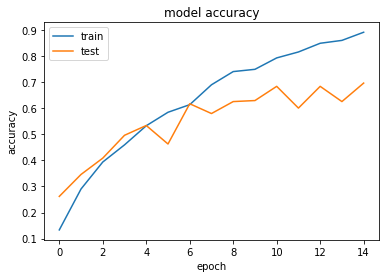

In [9]:
#visualize the results of the third model
plt.plot(training_results1.history['acc'])
plt.plot(training_results1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128,activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10,activation='softmax'))


model2.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

In [11]:
#train the fourth model
training_results2 = model2.fit_generator(
    train_generator,
    steps_per_epoch=number_train_examples // batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=number_validation_examples // batch_size)

Epoch 1/15
34/34 [==============================] - 118s 3s/step - loss: 2.3070 - acc: 0.1402 - val_loss: 2.0764 - val_acc: 0.2695
Epoch 2/15
34/34 [==============================] - 126s 4s/step - loss: 2.0706 - acc: 0.2722 - val_loss: 1.9515 - val_acc: 0.2750
Epoch 3/15
34/34 [==============================] - 122s 4s/step - loss: 1.8633 - acc: 0.3701 - val_loss: 1.7529 - val_acc: 0.4250
Epoch 4/15
34/34 [==============================] - 114s 3s/step - loss: 1.6382 - acc: 0.4230 - val_loss: 1.4196 - val_acc: 0.5375
Epoch 5/15
34/34 [==============================] - 123s 4s/step - loss: 1.4879 - acc: 0.4786 - val_loss: 1.4389 - val_acc: 0.4833
Epoch 6/15
34/34 [==============================] - 121s 4s/step - loss: 1.3438 - acc: 0.5462 - val_loss: 1.3021 - val_acc: 0.5458
Epoch 7/15
34/34 [==============================] - 118s 3s/step - loss: 1.1986 - acc: 0.5770 - val_loss: 1.1632 - val_acc: 0.5917
Epoch 8/15
34/34 [==============================] - 119s 3s/step - loss: 1.1281 - a

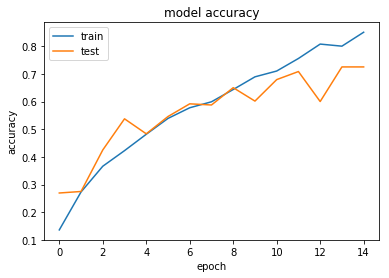

In [12]:
#visualize the results of the fourth model
plt.plot(training_results2.history['acc'])
plt.plot(training_results2..history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
#MODEL TO IMPROVE
#https://www.kaggle.com/hin7141/monkey-classification-with-cnn-90

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Activation
import os

train_dir = 'Monkey_Species/training'
test_dir = 'Monkey_Species/validation'

LR = 1e-3
height=150
width=150
channels=3
seed=1337
batch_size = 64
num_classes = 10
epochs = 15
data_augmentation = True
num_predictions = 20

# Training generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=seed,
                                                    shuffle=True,
                                                    class_mode='categorical')

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  shuffle=False,
                                                  class_mode='categorical')

train_num = train_generator.samples
validation_num = validation_generator.samples 

Found 1097 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [35]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [9]:
filepath=str(os.getcwd()+"/model.h5f")
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# = EarlyStopping(monitor='val_acc', patience=15)
callbacks_list = [checkpoint]#, stopper]

history = model.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              callbacks=callbacks_list, 
                              verbose = 1
                             )

Epoch 1/15
17/17 [==============================] - 132s 8s/step - loss: 2.3017 - acc: 0.1397 - val_loss: 2.1989 - val_acc: 0.2422

Epoch 00001: val_acc improved from -inf to 0.24219, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 2/15
17/17 [==============================] - 127s 7s/step - loss: 2.0738 - acc: 0.2461 - val_loss: 1.9832 - val_acc: 0.2383

Epoch 00002: val_acc did not improve from 0.24219
Epoch 3/15
17/17 [==============================] - 131s 8s/step - loss: 1.9207 - acc: 0.2996 - val_loss: 1.7573 - val_acc: 0.3672

Epoch 00003: val_acc improved from 0.24219 to 0.36719, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 4/15
17/17 [==============================] - 128s 8s/step - loss: 1.7194 - acc: 0.3946 - val_loss: 1.7349 - val_acc: 0.3750

Epoch 00004: val_acc improved from 0.36719 to 0.37500, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 5/15
17/17 [=================

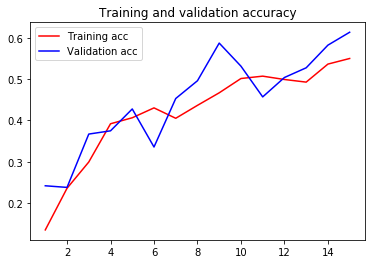

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.show()

In [28]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [29]:
filepath2=str(os.getcwd()+"/model.h5f")
checkpoint2 = ModelCheckpoint(filepath2, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# = EarlyStopping(monitor='val_acc', patience=15)
callbacks_list2 = [checkpoint2]#, stopper]

history2 = model2.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              callbacks=callbacks_list2, 
                              verbose = 1
                             )

Epoch 1/15
17/17 [==============================] - 138s 8s/step - loss: 2.2978 - acc: 0.1339 - val_loss: 2.2130 - val_acc: 0.1953

Epoch 00001: val_acc improved from -inf to 0.19531, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 2/15
17/17 [==============================] - 136s 8s/step - loss: 2.1148 - acc: 0.2512 - val_loss: 1.9356 - val_acc: 0.3516

Epoch 00002: val_acc improved from 0.19531 to 0.35156, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 3/15
17/17 [==============================] - 131s 8s/step - loss: 1.9200 - acc: 0.3006 - val_loss: 1.8057 - val_acc: 0.3555

Epoch 00003: val_acc improved from 0.35156 to 0.35547, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 4/15
17/17 [==============================] - 111s 7s/step - loss: 1.7399 - acc: 0.3759 - val_loss: 1.5531 - val_acc: 0.4688

Epoch 00004: val_acc improved from 0.35547 to 0.46875, saving model to C:\Users\rebec

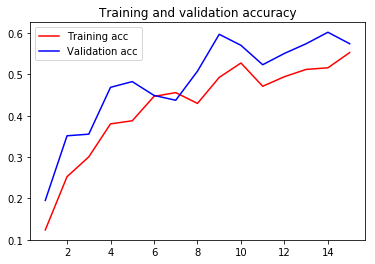

In [31]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.show()

In [41]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0))

model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.25))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [42]:
filepath3=str(os.getcwd()+"/model.h5f")
checkpoint3 = ModelCheckpoint(filepath3, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# = EarlyStopping(monitor='val_acc', patience=15)
callbacks_list3 = [checkpoint3]#, stopper]

history3 = model3.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              callbacks=callbacks_list3, 
                              verbose = 1
                             )

Epoch 1/15
17/17 [==============================] - 197s 12s/step - loss: 2.4183 - acc: 0.1327 - val_loss: 2.2647 - val_acc: 0.1211

Epoch 00001: val_acc improved from -inf to 0.12109, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 2/15
17/17 [==============================] - 184s 11s/step - loss: 2.1793 - acc: 0.2056 - val_loss: 2.1556 - val_acc: 0.2070

Epoch 00002: val_acc improved from 0.12109 to 0.20703, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 3/15
17/17 [==============================] - 188s 11s/step - loss: 2.0427 - acc: 0.2593 - val_loss: 1.8797 - val_acc: 0.3516

Epoch 00003: val_acc improved from 0.20703 to 0.35156, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 4/15
17/17 [==============================] - 157s 9s/step - loss: 1.8745 - acc: 0.3558 - val_loss: 1.6068 - val_acc: 0.4219

Epoch 00004: val_acc improved from 0.35156 to 0.42188, saving model to C:\Users\re

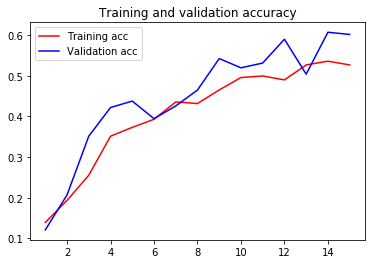

In [43]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.show()

In [46]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(32, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(64, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(64, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(128))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes))
model4.add(Activation('softmax'))

model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [47]:
filepath4=str(os.getcwd()+"/model.h5f")
checkpoint4 = ModelCheckpoint(filepath4, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# = EarlyStopping(monitor='val_acc', patience=15)
callbacks_list4 = [checkpoint4]#, stopper]

history4 = model4.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              callbacks=callbacks_list4, 
                              verbose = 1
                             )

Epoch 1/15
17/17 [==============================] - 149s 9s/step - loss: 2.2950 - acc: 0.1224 - val_loss: 2.2196 - val_acc: 0.2148

Epoch 00001: val_acc improved from -inf to 0.21484, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 2/15
17/17 [==============================] - 141s 8s/step - loss: 2.1287 - acc: 0.2233 - val_loss: 2.0130 - val_acc: 0.2656

Epoch 00002: val_acc improved from 0.21484 to 0.26562, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 3/15
17/17 [==============================] - 126s 7s/step - loss: 1.9820 - acc: 0.2683 - val_loss: 1.8669 - val_acc: 0.3008

Epoch 00003: val_acc improved from 0.26562 to 0.30078, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 4/15
17/17 [==============================] - 141s 8s/step - loss: 1.8723 - acc: 0.3189 - val_loss: 1.6513 - val_acc: 0.4453

Epoch 00004: val_acc improved from 0.30078 to 0.44531, saving model to C:\Users\rebec

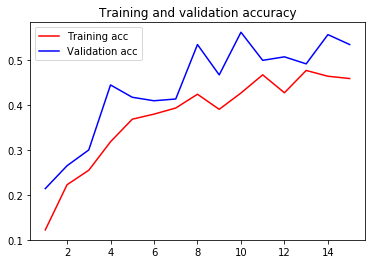

In [48]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.show()

In [52]:
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Conv2D(32, (3, 3)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(Conv2D(64, (3, 3)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Flatten())
model5.add(Dense(1024))
model5.add(Activation('relu'))
model5.add(Dropout(0.5))
model5.add(Dense(num_classes))
model5.add(Activation('softmax'))

model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [53]:
filepath5=str(os.getcwd()+"/model.h5f")
checkpoint5 = ModelCheckpoint(filepath5, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# = EarlyStopping(monitor='val_acc', patience=15)
callbacks_list5 = [checkpoint5]#, stopper]

history5 = model5.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              callbacks=callbacks_list5, 
                              verbose = 1
                             )

Epoch 1/15
17/17 [==============================] - 173s 10s/step - loss: 2.2818 - acc: 0.1259 - val_loss: 2.1971 - val_acc: 0.1992

Epoch 00001: val_acc improved from -inf to 0.19922, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 2/15
17/17 [==============================] - 134s 8s/step - loss: 2.0476 - acc: 0.2658 - val_loss: 1.9371 - val_acc: 0.2734

Epoch 00002: val_acc improved from 0.19922 to 0.27344, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 3/15
17/17 [==============================] - 140s 8s/step - loss: 1.8745 - acc: 0.2957 - val_loss: 2.0621 - val_acc: 0.3047

Epoch 00003: val_acc improved from 0.27344 to 0.30469, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 4/15
17/17 [==============================] - 141s 8s/step - loss: 1.7423 - acc: 0.3690 - val_loss: 1.5976 - val_acc: 0.4062

Epoch 00004: val_acc improved from 0.30469 to 0.40625, saving model to C:\Users\rebe

In [6]:
acc = history5.history['acc']
val_acc = history5.history['val_acc']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.show()

NameError: name 'history5' is not defined

In [12]:
model6 = Sequential()
model6.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Conv2D(32, (3, 3)))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))

model6.add(Conv2D(64, (3, 3), padding='same'))
model6.add(Activation('relu'))
model6.add(Conv2D(64, (3, 3)))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.5))

model6.add(Flatten())
model6.add(Dense(512))
model6.add(Activation('relu'))
model6.add(Dropout(0.75))
model6.add(Dense(num_classes))
model6.add(Activation('softmax'))

model6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [13]:
filepath6=str(os.getcwd()+"/model.h5f")
checkpoint6 = ModelCheckpoint(filepath6, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# = EarlyStopping(monitor='val_acc', patience=15)
callbacks_list6 = [checkpoint6]#, stopper]

history6 = model6.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              callbacks=callbacks_list6, 
                              verbose = 1
                             )

Epoch 1/15
17/17 [==============================] - 114s 7s/step - loss: 2.3235 - acc: 0.1182 - val_loss: 2.2888 - val_acc: 0.1172

Epoch 00001: val_acc improved from -inf to 0.11719, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 2/15
17/17 [==============================] - 140s 8s/step - loss: 2.2633 - acc: 0.1544 - val_loss: 2.2092 - val_acc: 0.1875

Epoch 00002: val_acc improved from 0.11719 to 0.18750, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 3/15
17/17 [==============================] - 133s 8s/step - loss: 2.2167 - acc: 0.1750 - val_loss: 2.2035 - val_acc: 0.1992

Epoch 00003: val_acc improved from 0.18750 to 0.19922, saving model to C:\Users\rebec\Desktop\Fall 2018\CS167\Project C/model.h5f
Epoch 4/15
17/17 [==============================] - 139s 8s/step - loss: 2.2150 - acc: 0.2060 - val_loss: 2.0233 - val_acc: 0.3086

Epoch 00004: val_acc improved from 0.19922 to 0.30859, saving model to C:\Users\rebec

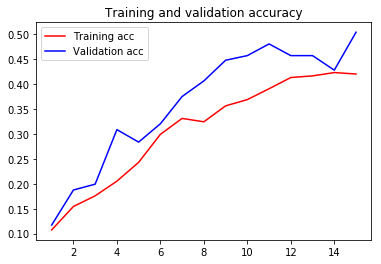

In [14]:
acc = history6.history['acc']
val_acc = history6.history['val_acc']
loss = history6.history['loss']
val_loss = history6.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.show()